In [2]:
import numpy as np
import librosa
import librosa.display
import pycwt
import soundfile as sf
import os
import matplotlib.pyplot as plt 
import threading
import time
import skimage.io
import math

In [3]:
import numpy

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def process_m(path,aug):
    mutex = threading.Lock()

    n_fft = 4096
    hop_length = 512
    n_mels = 512

    if (".wav") not in path:
        return

    #Change name of output file
    c=path.replace("DSD100_5"+aug,"DSD100_5"+aug+"_PP")
    #Choose directory 
    dir= c[0:(int)(c.rfind("\\"))]
    



    #print(c+"-Thread:"+str(threading.currentThread().name))
    mutex.acquire()

    if not os.path.exists(dir):
        try:
            os.makedirs(dir)
        except:
            print("oops")
    

    y, sr = librosa.load(path,duration=4.99)

    
    if(librosa.get_duration(y,sr)<4.98):
        print("Too short: "+path)
        return;
    
    mutex.release()



    # preprocess method (Spectrogram)
    newFile=c.replace(".wav","_Spec.png")
    D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
    s=0
    if not (os.path.exists(newFile)):
        mutex.acquire()
        
        mels = numpy.log(D + 1e-9) # add small number to avoid log(0)

        # min-max scale to fit inside 8-bit range
        img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
        img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
        img = 255-img # invert. make black==more energy

        # save as PNG
        skimage.io.imsave(newFile, img)

        mutex.release()
        s=1
    # preprocess method (Power Spectrogram db)
    newFile=c.replace(".wav","_PSdb.png")
    if not (os.path.exists(newFile)):
        DB = librosa.amplitude_to_db(D, ref=np.max)
        mutex.acquire()

        # save as PNG
        skimage.io.imsave(newFile, np.uint8(DB))
        mutex.release()
        s=1
    # preprocess method (MelSpectrogram)
    newFile=c.replace(".wav","_Mel.png")
    if not (os.path.exists(newFile)):
        S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        S_DB = librosa.power_to_db(S, ref=np.max)
        
        mutex.acquire()
        # save as PNG
        skimage.io.imsave(newFile, np.uint8(S_DB))
        mutex.release()
        s=1
    
 
    #preprocess method (Morlet Wavelet)
    #newFile=c.replace(".wav","_Mor.png")
    #if not (os.path.exists(newFile)):       
    #    W, scalesy, freqsy, coiy, ffty, fftfreqsy = pycwt.cwt(signal=y,dt=1/sr,s0=1/sr,J=math.log(y.size,2)*12,wavelet=u'morlet')
    #    Wdb =librosa.amplitude_to_db(np.asfortranarray(np.abs(W)),ref=np.max) 
    #    mutex.acquire()
    #    # save as PNG
    #    skimage.io.imsave(newFile, np.uint8(Wdb))
    #    mutex.release()

    if(s==1):
        print(c+"-Success:"+threading.currentThread().name)


In [4]:
def ThreadFunc(aug):
    global index
    global L
    while(index<len(L)):
        mutex = threading.Lock()
        mutex.acquire()
        spot=index
        index=index+1
        mutex.release()
        process_m(L[spot],aug)
    
   

In [ ]:
L=[]
index=0
root=r"C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec"
for path, subdirs, files in os.walk(root):
    for name in files:
        L.append(os.path.join(path, name))

x=[]

for i in range(1,50):
    T=threading.Thread(target=ThreadFunc,args=("sec",),daemon=True)
    T.name=str(i)
    x.append(T)
    T.start()
  
for th in x:    
    th.join()

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\051\mixture42.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\052\mixture41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\053\mixture39.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\054\mixture35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\055\mixture35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\056\mixture43.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\057\mixture67.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\058\mixture50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5sec\Mixtures\Dev\059\mixture79.wav


In [5]:
L=[]
index=0
root=r"C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise"
for path, subdirs, files in os.walk(root):
    for name in files:
        L.append(os.path.join(path, name))

x=[]

for i in range(1,50):
    T=threading.Thread(target=ThreadFunc,args=("Noise",),daemon=True)
    T.name=str(i)
    x.append(T)
    T.start()
  
for th in x:    
    th.join()

oopsoopsoops
oops


oops
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Dev\051\mixture42.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture20.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture03.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture17.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture38.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\052\mixture00.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture11.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture08.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture07.wav-Success:8C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture16.wav-Success:17

C:\Users\jayoj\Docume

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\052\mixture28.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture01.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\052\mixture22.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\052\mixture39.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture14.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture09.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture33.wav-Success:13C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture16.wav-Success:12

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture17.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture15.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture09.wav-Success:46C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture00.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture19.wav-Success:34
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Dev\056\mixture43.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture03.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture29.wav-Success:11oops

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture15.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture33.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture11.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture34.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DS

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture42.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture28.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture50.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture31.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture29.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture19.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture22.wav-Success:21C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture57.wav-Success:11

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture45.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture48.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture03.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture37.wav-Success:26C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture34.wav-Success:13C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture06.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture19.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture23.wav-Success:15


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture14.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture21.wav-Success:17C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture25.wav-Success:18

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\059\mixture02.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture12.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture43.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture31.wav-Success:38C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture37.wav-Success:10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture25.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture23.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture54.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture24.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture32.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\060\mixture26.wav-Success:13C:\Users\jayoj\Documents\GT\SML\Data\DSD100

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\061\mixture52.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\061\mixture54.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\061\mixture55.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\061\mixture58.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\061\mixture56.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\061\mixture59.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\062\mixture14.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\062\mixture03.wav-Success:8C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\062\mixture00.wav-Success:16


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\061\mixture57.wav-Success:41
Too short: C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture03.wav-Success:30Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Dev\064\mixture37.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture21.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture25.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture22.wav-Success:46C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture28.wav-Success:34

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture27.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture32.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\064\mixture03.wav-Success:35C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\063\mixture26.wav-Success:10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\065\mixture35.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\066\mixture08.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\066\mixture01.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\066\mixture09.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\065\mixture32.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\066\mixture03.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\066\mixture18.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\066\mixture04.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\066\mixture02.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\065\mixture36.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture16.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture28.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture18.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture17.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture37.wav-Success:11C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture20.wav-Success:43

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture22.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture38.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture15.wav-Success:21C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\067\mixture21.wav-Success:26C:\Users\jayoj\Documents\GT\SML\Data\DSD10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture29.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture34.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture17.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture24.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture21.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture36.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture32.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\069\mixture02.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\069\mixture03.wav-Success:28

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\068\mixture28.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\071\mixture01.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\070\mixture42.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\071\mixture14.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\071\mixture08.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\071\mixture11.wav-Success:40
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Dev\071\mixture51.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\071\mixture05.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\071\mixture04.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\071\mixture06.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\070\mixture38.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture40.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture46.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture42.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture43.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture41.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture39.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture26.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture45.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\072\mixture32.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\073\mixture04.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture23.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture39.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture13.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture20.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture28.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture30.wav-Success:25

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture21.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture15.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture22.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\074\mixture40.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture08.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture18.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture16.wav-Success:28C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture15.wav-Success:33

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture17.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture19.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture14.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture09.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture25.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\076\mixture24.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\077\mixture44.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\077\mixture37.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\077\mixture39.wav-Success:11C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\078\mixture16.wav-Success:28

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\077\mixture41.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\077\mixture32.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\078\mixture10.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\078\mixture03.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\077\mixture43.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\078\mixture06.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\079\mixture44.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\079\mixture34.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\079\mixture38.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\079\mixture51.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\080\mixture00.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\079\mixture53.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\080\mixture06.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\080\mixture16.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\080\mixture02.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\079\mixture50.wav-Success:38
Too short: C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture25.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture30.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture31.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture40.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture35.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture33.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture39.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture44.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture37.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\081\mixture46.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture09.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture21.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture12.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture24.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture28.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture26.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture16.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture23.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture30.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\083\mixture17.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\085\mixture08.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\085\mixture01.wav-Success:17
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Dev\085\mixture48.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\084\mixture49.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\084\mixture52.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\084\mixture51.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\085\mixture10.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\085\mixture05.wav-Success:34

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\085\mixture12.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\085\mixture00.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5N

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture39.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture43.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture36.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture33.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture45.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture41.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture42.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture49.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture44.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\086\mixture55.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\088\mixture11.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\087\mixture60.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\088\mixture06.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\087\mixture57.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\088\mixture08.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\088\mixture03.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\087\mixture59.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\087\mixture58.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\088\mixture13.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\088\mixture00.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture29.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture21.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture24.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture19.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture20.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture48.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture26.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture28.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture40.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\089\mixture22.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture59.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture52.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture55.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture60.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture61.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture56.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture62.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture63.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\090\mixture65.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\091\mixture00.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture21.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture13.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture14.wav-Success:25
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Dev\092\mixture64.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture11.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture20.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture24.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture22.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture15.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\092\mixture12.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5N

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture36.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture22.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture24.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\094\mixture09.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture33.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture30.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture37.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture41.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture39.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\093\mixture43.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture26.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture21.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture23.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture24.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture16.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture22.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture29.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture20.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture34.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\095\mixture36.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture22.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture26.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture21.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture35.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture25.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture27.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture18.wav-Success:39C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture30.wav-Success:37

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture33.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\096\mixture29.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture18.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture14.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture09.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture27.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture24.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture35.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture15.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture26.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture22.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\098\mixture25.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture06.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture02.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture14.wav-Success:13
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Dev\100\mixture55.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture10.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture04.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture05.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture12.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture09.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\100\mixture15.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\001\mixture46.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\001\mixture41.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\001\mixture44.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\001\mixture38.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\002\mixture02.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\002\mixture00.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\001\mixture36.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\001\mixture45.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\001\mixture39.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\002\mixture05.wav-Success:37
C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture05.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture37.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture15.wav-Success:17C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture03.wav-Success:42

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture29.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture31.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture26.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture30.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture27.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\004\mixture25.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture31.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture21.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture25.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture17.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture19.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture28.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture23.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture20.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture24.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\006\mixture26.wav-Success:14
C:\Users\jayoj\Documents\GT\SM

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture20.wav-Success:5C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture19.wav-Success:49

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture13.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture08.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture16.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture03.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture14.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture07.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture12.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\008\mixture15.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\009\mixture40.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\010\mixture10.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\009\mixture43.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\009\mixture41.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\010\mixture12.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\010\mixture03.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\010\mixture08.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\010\mixture06.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\010\mixture17.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\010\mixture13.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture51.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\012\mixture00.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture39.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture38.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture42.wav-Success:38C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture36.wav-Success:46

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture43.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture55.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture45.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\011\mixture57.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture24.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture32.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture28.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture25.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture30.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture33.wav-Success:44C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture34.wav-Success:16

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture31.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture36.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\013\mixture26.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\014\mixture29.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture03.wav-Success:29C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture07.wav-Success:43

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture10.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture05.wav-Success:26C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture18.wav-Success:36

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture17.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture20.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture12.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\015\mixture11.wav-Success:11
C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\016\mixture48.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\016\mixture46.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\017\mixture11.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\016\mixture47.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\016\mixture52.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\017\mixture14.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\017\mixture17.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\017\mixture01.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\016\mixture53.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\017\mixture16.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\018\mixture25.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\019\mixture11.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\018\mixture23.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\019\mixture02.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\018\mixture27.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\019\mixture09.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\019\mixture01.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\018\mixture16.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\019\mixture07.wav-Success:8C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\019\mixture03.wav-Success:17

C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture39.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture45.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture37.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture33.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\021\mixture05.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture42.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture44.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture36.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\021\mixture13.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\020\mixture47.wav-Success:21
C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture31.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture34.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture35.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture32.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture22.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture27.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture43.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture38.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture30.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\022\mixture41.wav-Success:10C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture12.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture04.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture20.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture25.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture29.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture21.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture18.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture43.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture22.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\024\mixture16.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\025\mixture34.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture26.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture00.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture02.wav-Success:27C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture07.wav-Success:41

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Test\026\mixture58.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture12.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture13.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture17.wav-Success:31C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\026\mixture14.wav-Success:11

C:\Users\jayoj\Documents\GT\SML\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture32.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture30.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture51.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture44.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture39.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture40.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture35.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture31.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture42.wav-Success:36C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\027\mixture34.wav-Success:28

C:\Users\jayoj\Documents\GT\SML\Da

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture27.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture16.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture17.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture12.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture22.wav-Success:16
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Mixtures\Test\029\mixture68.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture21.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture29.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture19.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\029\mixture25.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Da

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture36.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture45.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture33.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture32.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture43.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture28.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture42.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture40.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture50.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\030\mixture37.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Da

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture20.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture29.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture26.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture31.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture35.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture30.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture33.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture34.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\033\mixture01.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\032\mixture32.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture04.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\033\mixture56.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture07.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture22.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture11.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture12.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture15.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture10.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture14.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\034\mixture16.wav-Success:12
C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture04.wav-Success:42C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture03.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture05.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture14.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture22.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture13.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture10.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture18.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture28.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\036\mixture23.wav-Success:30
C:\Users\jayoj\Documents\GT\SM

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture23.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture25.wav-Success:16C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture13.wav-Success:18

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture18.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture22.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture19.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture21.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture17.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture20.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\037\mixture34.wav-Success:43
C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\039\mixture04.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\039\mixture12.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\039\mixture08.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\038\mixture50.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\038\mixture44.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\038\mixture45.wav-Success:27C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\039\mixture07.wav-Success:26

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\039\mixture18.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\039\mixture21.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\039\mixture11.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture12.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture34.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture21.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture22.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture19.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture23.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture31.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture29.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture32.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\040\mixture26.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture12.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture21.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture16.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture06.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture02.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\041\mixture44.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture13.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture19.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture18.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\042\mixture29.wav-Success:37
C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture18.wav-Success:27C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture11.wav-Success:1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture29.wav-Success:44C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture16.wav-Success:5

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture19.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture12.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture23.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture00.wav-Success:21C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture33.wav-Success:34

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\044\mixture07.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture56.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture65.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture70.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture64.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture57.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture67.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture68.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture71.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture62.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\045\mixture72.wav-Success:44
Too short: C:\Users\jayoj\Docum

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture27.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture23.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture21.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture41.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture24.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture29.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture39.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture38.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture36.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\047\mixture30.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\049\mixture24.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\049\mixture30.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\049\mixture25.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\050\mixture14.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\049\mixture27.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\050\mixture02.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\050\mixture15.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\050\mixture08.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\050\mixture18.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Test\050\mixture05.wav-Success:42
C:\Users\jayoj\Documents\GT\SML

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\drums07.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\bass24.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\bass23.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\drums00.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\bass31.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\drums02.wav-Success:9C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\drums01.wav-Success:24

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\bass32.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\bass40.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\bass26.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\bass41.w

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\other30.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\other40.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\other24.wav-Success:38C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\other34.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\vocals01.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\vocals03.wav-Success:48

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\other27.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\other32.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\vocals00.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\051\vocals18.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums01.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums06.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums00.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums10.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums03.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums09.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums21.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums12.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums15.wav-Success:14C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\drums04.wav-Success:48

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals09.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals05.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals18.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals17.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals19.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals03.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals11.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals14.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals21.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\052\vocals08.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums11.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums08.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\other02.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums28.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums22.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums21.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums23.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums19.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums27.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\drums34.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\vocals28.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\vocals23.wav-Success:18C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\vocals33.wav-Success:40

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\vocals37.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\vocals22.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\bass01.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\vocals29.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\053\vocals38.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\bass06.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\bass02.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other14.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other09.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other16.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other10.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other13.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other17.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other23.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other06.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other27.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\other18.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\054\ot

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\drums04.wav-Success:24C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\bass26.wav-Success:44

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\bass32.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\bass27.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\bass21.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\drums07.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\drums01.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\bass34.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\drums09.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\drums03.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\drums02

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals09.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals27.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals10.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals16.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals13.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals17.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals11.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals20.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals24.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\055\vocals22.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums16.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums24.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums28.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums33.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums31.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums26.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums38.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums22.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums29.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\drums30.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\d

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals20.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals28.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals16.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals22.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals25.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\bass03.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals36.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals33.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals37.wav-Success:49C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\056\vocals31.wav-Success:17

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\bass66.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums05.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums03.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums10.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums24.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums22.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums19.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums18.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums17.wav-Success:29C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\drums09.wav-Success:11

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\dru

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other20.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other22.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other32.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other28.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other41.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other27.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other47.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other31.wav-Success:7C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other37.wav-Success:8

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\other39.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\ot

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\vocals59.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\vocals54.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\bass02.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\vocals53.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\bass03.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\vocals50.wav-Success:14C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\vocals66.wav-Success:36

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\vocals56.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\057\vocals63.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\bass04.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums28.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums34.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums32.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums30.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums20.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums24.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums17.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums25.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums33.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\drums22.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals19.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals08.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals14.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals21.wav-Success:24C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals15.wav-Success:47

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals05.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals10.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals11.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals28.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\058\vocals31.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass52.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass48.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass42.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass46.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass49.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass58.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass51.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass61.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass62.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass56.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\bass71.wav-

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums73.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums48.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums55.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums77.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums67.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums66.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\other00.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums71.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums75.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\drums74.wav-Success:29C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\oth

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals06.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\other70.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\other68.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals11.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\other75.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\other78.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals04.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals05.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals10.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals21.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals76.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\059\vocals77.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass06.wav-Success:41
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\060\bass55.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass02.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass07.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass10.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass13.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass04.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass22.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\bass11.wa

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums38.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums37.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums33.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums36.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums29.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums40.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums39.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums43.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums44.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\drums24.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals01.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals10.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals28.wav-Success:40C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals07.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals25.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals17.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals29.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals09.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals14.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\060\vocals23.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Source

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass51.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass47.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass38.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass45.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass53.wav-Success:28C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass50.wav-Success:37

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass46.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass55.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\drums01.wav-Success:40C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass56.wav-Success:33

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\bass52.wav-

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other10.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other22.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other16.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other18.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other26.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other27.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other30.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other21.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other17.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\other33.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\o

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals52.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals45.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals49.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals55.wav-Success:16C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals54.wav-Success:33

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals38.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals43.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals46.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals56.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\061\vocals50.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums22.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums26.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums24.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums31.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums32.wav-Success:32C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums33.wav-Success:30

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums39.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums30.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums42.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\drums37.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\d

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals17.wav-Success:4C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals15.wav-Success:11C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals21.wav-Success:15


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals16.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals19.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals11.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals13.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals23.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals24.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\062\vocals32.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums18.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums10.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums11.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums16.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums13.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums19.wav-Success:8

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums17.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums24.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums27.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drums20.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\drum

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\vocals29.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\vocals24.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\bass01.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\bass03.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\bass00.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\vocals31.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\vocals28.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\vocals33.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\vocals32.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\063\vocals34.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\other06.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\drums31.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\other02.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\other09.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\other00.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\other07.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\drums35.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\drums34.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\drums32.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\other10.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\064\ot

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass14.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass15.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass17.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass07.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass31.wav-Success:36C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass22.wav-Success:41

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass21.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass16.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass19.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass34.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\bass27.wav-S

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\other31.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\other32.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\other26.wav-Success:32
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\065\vocals39.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\other22.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\other28.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\other30.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\vocals02.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\other29.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\vocals04.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\065\o

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass27.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass32.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass43.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass24.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass45.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass34.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass37.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass39.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass50.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass52.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\bass53.wav-

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\drums58.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\drums59.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other10.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other00.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other11.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other07.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other09.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other01.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other06.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\other04.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals40.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals34.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals32.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals33.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals37.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals31.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals36.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals35.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals29.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\066\vocals42.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass41.wav-Success:18C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass40.wav-Success:14

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass59.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass49.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass62.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass63.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass68.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass51.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass66.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass61.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\bass69.wav

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums52.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums61.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums60.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums55.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums58.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums67.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums62.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums74.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums66.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\drums59.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\d

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other64.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other18.wav-Success:7C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other49.wav-Success:31

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other23.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other42.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other58.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other74.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals00.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other68.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\other85.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals59.wav-Success:2

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals63.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals57.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals39.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals75.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals49.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals66.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals54.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals72.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\067\vocals77.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Source

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\other09.wav-Success:46C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\other03.wav-Success:22

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\drums25.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\drums20.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\drums35.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\drums36.wav-Success:10C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\drums08.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\drums27.wav-Success:44

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\drums21.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\other02.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\o

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\vocals39.wav-Success:12C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\068\vocals38.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass07.wav-Success:5

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass12.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass09.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass18.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass05.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass10.wav-Success:22C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass23.wav-Success:13

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass01.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\bass08.wa

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\other25.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\other30.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\vocals02.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\vocals13.wav-Success:31C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\other24.wav-Success:12

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\vocals17.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\vocals00.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\vocals05.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\other29.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\069\vocals16.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\De

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums12.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums13.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums09.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums11.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums20.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums15.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums31.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums14.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums17.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\drums21.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals26.wav-Success:44C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\other42.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals14.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals05.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals00.wav-Success:23C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals08.wav-Success:43

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals25.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals21.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals19.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\070\vocals18.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums09.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums13.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums20.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums11.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums08.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums06.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums16.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums10.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums17.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\drums31.wav-Success:28

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\other44.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\other32.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\other45.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\other48.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\other43.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\vocals02.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\other40.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\vocals03.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\other47.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071\vocals01.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\071

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass19.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass37.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass43.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass18.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass36.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass17.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass33.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass25.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass47.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass38.wav-Success:5C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\bass49.wav-Su

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other11.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other15.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other18.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other27.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other29.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other14.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other13.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other24.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other17.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\other46.wav-Success:22C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\o

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\vocals48.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass06.wav-Success:25
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\073\bass51.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass03.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass13.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass07.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\072\vocals47.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass04.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass12.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass11.wav-Success:16C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\bass08.wav

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\other10.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\drums35.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\drums29.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\drums46.wav-Success:46C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\drums33.wav-Success:19

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\other18.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\other05.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\drums50.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\drums49.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\other02.wav-Success:31C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\dru

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals27.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals18.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals37.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals32.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals30.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals34.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals41.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\bass02.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals45.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\073\vocals35.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\De

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums24.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums14.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums28.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\bass49.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums11.wav-Success:4C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums03.wav-Success:23

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums10.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums23.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\bass51.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\drums18.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\dru

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\vocals10.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\other37.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\other43.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\other48.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\other40.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\vocals04.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\vocals13.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\other41.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\vocals12.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\074\other51.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\07

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass18.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass27.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass25.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass30.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass28.wav-Success:20C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass29.wav-Success:4

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass33.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass38.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass31.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass37.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\bass35.wav-Su

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other29.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other31.wav-Success:33C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other25.wav-Success:48

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other17.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other34.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other37.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other27.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other39.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other41.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\other36.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\075\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass18.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass30.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass36.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass25.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass31.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass23.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass34.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass29.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass49.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass35.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\bass22.wav-S

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\drums54.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other02.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other08.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other06.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other00.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other12.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other10.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other07.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other11.wav-Success:39
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\076\other56.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\other

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals36.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals45.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals30.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals20.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals35.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals22.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals51.wav-Success:29C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals49.wav-Success:16

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals46.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\076\vocals50.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums22.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums35.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums31.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums25.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums33.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums21.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums32.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drums30.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\other05.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\other01.wav-Success:26C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\drum

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals22.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals24.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals21.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals32.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals25.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals26.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals19.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals36.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals35.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\077\vocals31.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Source

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\drums32.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\drums38.wav-Success:33C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\drums30.wav-Success:9

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\078\other39.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\drums33.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\other13.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\drums17.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\other06.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\other05.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\drums36.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\othe

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\vocals36.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\bass10.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\bass08.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\vocals35.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\078\vocals37.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\bass04.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\bass03.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\bass23.wav-Success:12
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\079\bass54.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\bass18.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\bass13.

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums26.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums33.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums39.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums36.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums44.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums49.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums41.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums45.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums50.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\drums37.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\d

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals14.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals29.wav-Success:38

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals11.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals26.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals19.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals13.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals18.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals27.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals23.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\079\vocals28.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\bass44.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums02.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums10.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums12.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums08.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums07.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums14.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums09.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums29.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\drums22.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\dru

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\vocals05.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\other42.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\vocals00.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\other46.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\other47.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\vocals01.wav-Success:42
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\080\vocals49.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\vocals12.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\vocals04.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\080\other40.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\08

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass37.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass45.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass52.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass47.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\drums03.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass42.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass32.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass34.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass41.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass40.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\bass35.wav

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other19.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other13.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other26.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other10.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other11.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other21.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other23.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other17.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other09.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\other18.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\o

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals43.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals40.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals42.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals44.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals56.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals57.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals47.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals50.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals48.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\081\vocals54.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\drums25.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\drums42.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\drums38.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\drums40.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\drums26.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\other01.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\other06.wav-Success:16
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\082\other44.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\other09.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\drums32.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\oth

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals36.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals24.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals37.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals32.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals34.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals40.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\bass04.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals41.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\bass07.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\082\vocals38.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums29.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums22.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums34.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums45.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums38.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums43.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\other00.wav-Success:36

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums42.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums32.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\drums33.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\d

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals27.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals17.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals32.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals29.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals11.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals30.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals21.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals28.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals37.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\083\vocals33.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums18.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums07.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums00.wav-Success:35
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\084\drums57.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums13.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums15.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums14.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums09.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums11.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\drums06.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\bass5

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other39.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other43.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other28.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other38.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other48.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other45.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other40.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\vocals02.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other50.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084\other42.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\084

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass09.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass19.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass05.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass23.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass11.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass26.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass17.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass29.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass22.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass27.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\bass24.wav-

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\drums47.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other01.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other00.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other12.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other16.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other08.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other07.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other28.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other19.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\other15.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\ot

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\bass04.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\vocals40.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\bass01.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\bass05.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\vocals42.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\vocals44.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\085\vocals47.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\bass03.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\bass19.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\bass14.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\bas

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums37.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums25.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums28.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums30.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums23.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums19.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums27.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums34.wav-Success:35

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums31.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\drums29.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other54.wav-Success:32C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other55.wav-Success:1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other51.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other62.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other50.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other61.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other49.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\vocals15.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\vocals14.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\other56.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\086\v

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass19.wav-Success:24
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\087\bass65.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass17.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass10.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass12.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass20.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass28.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass31.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass29.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass30.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\bass25.wav-Suc

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums48.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums41.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums46.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums51.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums37.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums45.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums52.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums38.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums50.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\drums53.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals17.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals07.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals02.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals23.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals00.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals05.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals26.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals25.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\other63.wav-Success:42C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\087\vocals21.wav-Success:1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass33.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass31.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass40.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass23.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass41.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass36.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass37.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass27.wav-Success:19C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass28.wav-Success:6

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass43.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\bass30.wav-S

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\drums50.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\drums60.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\other01.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\drums45.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\drums46.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\drums57.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\other09.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\drums61.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\other04.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\drums52.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals07.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals12.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals28.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals25.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals11.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals17.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals33.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals35.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals16.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\088\vocals29.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Source

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\drums02.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\drums00.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\bass37.wav-Success:21
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\089\drums49.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\bass31.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\drums06.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\drums04.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\bass40.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\drums07.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\drums11.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\drums01.w

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\vocals00.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\other42.wav-Success:31C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\other34.wav-Success:2

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\other38.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\other39.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\other46.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\vocals03.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\other43.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\vocals04.wav-Success:8
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\089\vocals49.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\089\vo

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass28.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass37.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass20.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass46.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass33.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass43.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass36.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass41.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass47.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass38.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\bass40.wav-S

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums38.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums44.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\other00.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums59.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums47.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums53.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums57.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums64.wav-Success:37C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\drums58.wav-Success:42

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\other05.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\ot

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals12.wav-Success:20C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals01.wav-Success:25

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals07.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals06.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\other63.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals13.wav-Success:27C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals24.wav-Success:11

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals18.wav-Success:14
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\090\vocals66.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\090\vocals09.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass22.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass40.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass36.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass57.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass31.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass39.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass45.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass25.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass29.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass24.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\bass32.wav-S

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\other04.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\other00.wav-Success:17C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\other05.wav-Success:16

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\other01.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\drums59.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\other06.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\other03.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\other12.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\drums58.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\drums60.wav-Success:30C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\ot

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals21.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals18.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals27.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals14.wav-Success:29C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals24.wav-Success:18C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals15.wav-Success:7


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals37.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals39.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals31.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\091\vocals26.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\De

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\bass43.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\bass50.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\drums07.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\bass63.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\bass58.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\drums13.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\bass57.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\bass59.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\drums05.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\bass60.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\drums00.w

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other38.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other23.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other07.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other06.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other21.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other24.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other29.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other33.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other22.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\other31.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\othe

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals50.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals36.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals47.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals45.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals48.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals53.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals54.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals56.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals46.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\092\vocals51.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums28.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums27.wav-Success:29C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums29.wav-Success:44

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums19.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums31.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums39.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums21.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums24.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums23.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\drums30.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\d

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals27.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals08.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals14.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals20.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals29.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals16.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals15.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals30.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals24.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\093\vocals25.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums02.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums23.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums20.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums09.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums17.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums05.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums19.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums16.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums10.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\drums22.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals10.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\other46.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals03.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals11.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals13.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals16.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals14.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals02.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals12.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\094\vocals18.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass60.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass62.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass68.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass44.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass50.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass58.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass52.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass48.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass55.wav-Success:25C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass63.wav-Success:23

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\bass65.wav-

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums50.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums57.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums58.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums54.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums56.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums55.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums67.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums61.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums73.wav-Success:12C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\drums60.wav-Success:6

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\dru

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other54.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other57.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other50.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other53.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other60.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other59.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other70.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other66.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other63.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\other62.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\oth

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals52.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals67.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals65.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals60.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals57.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals62.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals53.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals66.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals54.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\095\vocals47.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums10.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums05.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums09.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums03.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums11.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums06.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums14.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums15.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums22.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\drums23.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\dru

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals06.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\other46.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals10.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals07.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals21.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals14.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals20.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals03.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals05.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\096\vocals23.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\D

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums18.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums05.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums20.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums11.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\other04.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums39.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums28.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums35.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums12.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\drums29.wav-Success:44C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\dr

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\other20.wav-Success:2
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\097\vocals47.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\other45.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\vocals06.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\vocals04.wav-Success:3C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\other35.wav-Success:26

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\vocals00.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\vocals07.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\vocals08.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097\vocals18.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\097

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\bass41.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\bass39.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\drums09.wav-Success:6Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\098\drums47.wav

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\bass45.wav-Success:19C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\drums05.wav-Success:42

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\drums00.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\drums06.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\drums01.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\drums04.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\drums07.

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\other34.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\other35.wav-Success:46
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\098\vocals47.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\vocals00.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\other37.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\vocals02.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\vocals01.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\other45.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\other40.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\098\vocals11.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\09

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\bass48.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\bass43.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\bass39.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\drums06.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\drums05.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\drums02.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\bass35.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\bass33.wav-Success:30C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\bass41.wav-Success:6

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\drums01.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\drums04.

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other25.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other23.wav-Success:26

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other18.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other34.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other32.wav-Success:3
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Dev\099\other50.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other39.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other46.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\vocals25.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\vocals00.wav-Success:5C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\other

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass19.wav-Success:35C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\vocals49.wav-Success:22

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass16.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\099\vocals47.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass20.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass26.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass29.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass32.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass33.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass46.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\bass35.

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\drums41.wav-Success:40C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other07.wav-Success:2

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other18.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other06.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other09.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other05.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\drums53.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other03.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other13.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\other02.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\ot

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\vocals35.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\vocals36.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\bass00.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\vocals22.wav-Success:39C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\bass05.wav-Success:2

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\vocals50.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\vocals47.wav-Success:21
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\001\bass47.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\vocals41.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\bass07.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Dev\100\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums26.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums37.wav-Success:2C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums33.wav-Success:3

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums35.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums16.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\other08.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\other04.wav-Success:10C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums41.wav-Success:8

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums46.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\drums36.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals31.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals35.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals44.wav-Success:32C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals34.wav-Success:1

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals18.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals37.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals27.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals25.wav-Success:41C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\001\vocals26.wav-Success:5

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\002\bass33.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sou

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\drums26.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\drums30.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\drums31.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\drums25.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\drums22.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\drums14.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\drums12.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\other15.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\other04.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\002\other10.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\bass12.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\drums07.wav-Success:49C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\bass22.wav-Success:44

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\bass21.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\bass11.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\bass19.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\bass24.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\drums06.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\bass23.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\drums16.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals15.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals03.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\other29.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals18.wav-Success:33C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals13.wav-Success:45

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals20.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals12.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals16.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals17.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\003\vocals11.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\004\other40.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\other09.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\drums24.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\drums37.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\drums22.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\other06.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\drums39.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\drums31.wav-Success:34C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\drums29.wav-Success:22

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\drums38.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Te

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\bass06.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\bass21.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\vocals37.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\vocals39.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\bass01.wav-Success:29

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\bass15.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\bass07.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\bass10.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\004\vocals38.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\bass17.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Tes

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other12.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other01.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other05.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other04.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other24.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other29.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other07.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other17.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other23.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\005\other03.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass10.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass13.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass11.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass14.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass27.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass12.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass23.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass15.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass08.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\bass22.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\b

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums47.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums45.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums42.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\other00.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums34.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\other01.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums50.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums51.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums36.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\drums46.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals25.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals18.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals28.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals36.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals24.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals19.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals29.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals30.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals38.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\006\vocals31.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums15.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums11.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums13.wav-Success:31C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums07.wav-Success:2

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums17.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums19.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums20.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums22.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums23.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\drums27.wav-Success:20C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals18.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals14.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals15.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals08.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals19.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals22.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals11.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals13.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals28.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\007\vocals27.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums09.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums18.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums15.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums23.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums31.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums21.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums29.wav-Success:8C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums19.wav-Success:30C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums26.wav-Success:40


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\drums22.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Te

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals04.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\other37.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals07.wav-Success:22C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals14.wav-Success:16

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals11.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals08.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals16.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals13.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals15.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\008\vocals25.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums02.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\bass38.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\bass39.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums05.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums08.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums18.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums19.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums16.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums06.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\drums20.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Te

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals14.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals05.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals09.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals10.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals04.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals23.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals17.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals15.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals07.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\009\vocals20.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums06.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums07.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums08.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\bass48.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums04.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums18.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums03.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums21.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums14.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\drums12.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\vocals05.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\other46.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\vocals02.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\other40.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\vocals00.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\other47.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\vocals04.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\other48.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\010\other43.wav-Success:10
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\010\vocals50.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sourc

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass41.wav-Success:17C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass34.wav-Success:41

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass26.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass37.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass29.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass32.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass42.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass38.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass20.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\bass43.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\other03.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\drums57.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\other02.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\other01.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\other04.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\drums53.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\drums50.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\other14.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\other24.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\other10.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals20.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals31.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals23.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals45.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals30.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals41.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals35.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals39.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals50.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\011\vocals37.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums13.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums03.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums07.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums25.wav-Success:21C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums09.wav-Success:35

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums23.wav-Success:5C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums08.wav-Success:23

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums10.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums18.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\drums27.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\other42.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals08.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals03.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals04.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals05.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals10.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals02.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals16.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals07.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\012\vocals24.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass39.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass47.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass50.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass51.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass60.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass46.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass56.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass63.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass52.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\bass54.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\ba

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\drums61.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\drums57.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\drums62.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\drums60.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\drums64.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\other13.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\drums65.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\drums69.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\other01.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\other02.wav-Success:22C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals22.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals08.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals30.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals13.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals07.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals19.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals24.wav-Success:35C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals16.wav-Success:47

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals15.wav-Success:6C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\013\vocals18.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\bass20.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\bass16.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\bass31.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\bass25.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\drums14.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\bass29.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\drums05.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\drums00.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\drums02.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\bass32.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals17.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals12.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals20.wav-Success:31
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\015\bass38.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals25.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals28.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals22.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals31.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals24.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\014\vocals23.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sourc

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\other12.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\drums31.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\other02.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\other08.wav-Success:4C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\drums33.wav-Success:34

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\drums37.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\other01.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\other09.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\drums32.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\015\other03.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Te


Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\016\bass54.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass20.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass15.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass02.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass07.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass12.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass21.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass08.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass10.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bass22.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\bas

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums47.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums33.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums36.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums40.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums41.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums42.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\other01.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums45.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\other03.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\drums46.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals20.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals26.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals25.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals22.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals30.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals29.wav-Success:41

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals32.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals23.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals33.wav-Success:16

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\016\vocals21.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\bass60.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\bass52.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\bass58.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\drums06.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\drums03.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\bass56.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\drums08.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\drums00.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\drums05.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\drums01.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Tes

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other16.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other19.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other25.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other20.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other18.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other26.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other22.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other32.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other21.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\other29.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals53.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals44.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals49.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals45.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals47.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals51.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals55.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals46.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals54.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\017\vocals50.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other00.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other09.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\drums27.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other14.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other13.wav-Success:32C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other04.wav-Success:23

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other06.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other21.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other20.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\018\other15.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums04.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums02.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums03.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums00.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\bass38.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums07.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums13.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums06.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums05.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\drums01.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals01.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals19.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals07.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals15.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals11.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals16.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals12.wav-Success:18C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals06.wav-Success:14

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals03.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\019\vocals17.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_P

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\020\drums48.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums16.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums31.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums45.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums44.wav-Success:48

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums41.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums37.wav-Success:17C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums21.wav-Success:33

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums08.wav-Success:38C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\drums11.wav-Success:35

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Te

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\other17.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\vocals06.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\other44.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\other19.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\vocals04.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\vocals13.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\vocals11.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\vocals16.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\vocals14.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\020\vocals10.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\S

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass33.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass21.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass30.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass29.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass38.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass32.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass36.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass40.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass35.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\bass46.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\b

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other18.wav-Success:28C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other45.wav-Success:21

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other22.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other39.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other41.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other13.wav-Success:20C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other50.wav-Success:8


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other30.wav-Success:24C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\vocals00.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\021\other49.wav-Success:40


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass07.wav-Success:40C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass25.wav-Success:21C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass30.wav-Success:15



C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass39.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass23.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass17.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass16.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass05.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass29.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\bass48.wav-Success:7

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other27.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other19.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other32.wav-Success:23C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other15.wav-Success:4C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other21.wav-Success:18


Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\022\other57.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other17.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other26.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other06.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\other22.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Te

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\023\bass38.wavC:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\bass13.wav-Success:2


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\vocals36.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\bass00.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\vocals48.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\vocals44.wav-Success:36C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\vocals50.wav-Success:10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\vocals54.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\vocals37.wav-Success:37C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\022\vocals30.wav-Success:5

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Source

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other05.wav-Success:49C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other26.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other21.wav-Success:36

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other22.wav-Success:42C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other18.wav-Success:41

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\drums36.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other10.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\drums32.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other32.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\023\other36.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass17.wav-Success:15C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass20.wav-Success:35

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\drums00.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass30.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass29.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\drums04.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass44.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass15.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass51.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\bass33.wav-Success:3C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\02

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other10.wav-Success:4C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other13.wav-Success:17

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other20.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other19.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other23.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other50.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other35.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other17.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other49.wav-Success:11C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\other14.wav-Success:44

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\vocals21.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\vocals46.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\vocals48.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\vocals50.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\vocals33.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\vocals31.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\024\vocals51.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\bass01.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\bass04.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\bass07.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\So

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\drums18.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\drums21.wav-Success:28C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\drums36.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\drums26.wav-Success:43

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\other11.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\drums23.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\other04.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\other13.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\other17.wav-Success:27

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\025\other14.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass29.wav-Success:14C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass23.wav-Success:43

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass12.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass25.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass11.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass10.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass19.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass31.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass30.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\bass35.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\b

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\drums35.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\drums49.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\drums52.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\drums57.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\other00.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\drums54.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\other07.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\other14.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\other03.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\other02.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Source

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals06.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals21.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals18.wav-Success:43C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals36.wav-Success:15

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals26.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals30.wav-Success:42C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals27.wav-Success:23

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals38.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals33.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\026\vocals39.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\drums12.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\drums04.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\drums13.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\bass53.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\bass45.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\drums10.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\bass47.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\drums05.wav-Success:39C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\drums28.wav-Success:32

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\drums20.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Tes

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\other43.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\other53.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\vocals05.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\other51.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\other36.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\other42.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\vocals06.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\other40.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\other49.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\027\vocals08.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sourc

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass30.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass24.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass19.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass25.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass27.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass22.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass29.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass28.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\drums00.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\bass32.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other14.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other15.wav-Success:33C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other05.wav-Success:34

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other16.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other19.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other22.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other11.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other23.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other21.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\028\other18.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Source

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\029\bass68.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass25.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass23.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass21.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass27.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass47.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass33.wav-Success:32C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass22.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass37.wav-Success:48

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass28.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\bass

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums49.wav-Success:6C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums31.wav-Success:26

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums38.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums28.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums43.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums41.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums51.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\drums53.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\other14.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\other03.wav-Success:35C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals07.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals03.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\other66.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals08.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals01.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals12.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals06.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals09.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals05.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\029\vocals21.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass26.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass12.wav-Success:14C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass31.wav-Success:22

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass22.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass21.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass27.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass24.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass33.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass08.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\bass42.wav-Success:2C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\b

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other04.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other16.wav-Success:36

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other23.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other30.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other32.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other28.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other17.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other26.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other35.wav-Success:18C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\other34.wav-Success:31

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass16.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass11.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass19.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\vocals42.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass27.wav-Success:7C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass28.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\030\vocals40.wav-Success:32


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass00.wav-Success:21C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass34.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\bass21.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other35.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\drums43.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other06.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other18.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other14.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other12.wav-Success:33C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other17.wav-Success:36

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other23.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other03.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\other05.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass05.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\vocals39.wav-Success:21C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass02.wav-Success:43

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\031\vocals32.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass00.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass04.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass06.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass07.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass15.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\bass14.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\drums28.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\other03.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\drums22.wav-Success:18

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\drums33.wav-Success:31C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\drums41.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\drums25.wav-Success:44

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\other14.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\other05.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\other08.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\032\drums30.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass13.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass09.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass12.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass10.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass14.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass20.wav-Success:30C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass04.wav-Success:12

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass25.wav-Success:46
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\033\bass63.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\bass11.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\ba

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums36.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums28.wav-Success:10C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums45.wav-Success:34

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums58.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums34.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums62.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums46.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums38.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums30.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\drums40.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals01.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\other61.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\other60.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals13.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals10.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals00.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals09.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals14.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals11.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\033\vocals05.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass18.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass25.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass22.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass23.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass30.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass27.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass24.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass26.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass35.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\bass34.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other13.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other20.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other09.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other05.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other14.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other18.wav-Success:33C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other22.wav-Success:25

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other30.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other19.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\other23.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\bass11.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\bass01.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\vocals48.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\bass08.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\bass10.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\bass02.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\bass09.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\vocals46.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\034\vocals47.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\bass15.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other13.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other28.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other26.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other20.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other29.wav-Success:5
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\035\vocals35.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other17.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other25.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other21.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\035\other31.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass38.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass39.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass44.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass31.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass37.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass50.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass46.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass43.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass57.wav-Success:4C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\bass40.wav-Success:31

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\b

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums48.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums45.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums56.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums59.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums47.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums55.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums61.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums51.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums58.wav-Success:2C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\drums60.wav-Success:24

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Tes

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other51.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other55.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other57.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other64.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other61.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other58.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other65.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other67.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other59.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\other74.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass16.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass05.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass19.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass11.wav-Success:25C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass24.wav-Success:3C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass21.wav-Success:45


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\vocals71.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass00.wav-Success:20C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass13.wav-Success:5

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\036\vocals78.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\03

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums24.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums11.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums28.wav-Success:7C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums12.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums18.wav-Success:15

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums26.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\bass46.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums25.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums17.wav-Success:10C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\drums32.wav-Success:27

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals10.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals15.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals00.wav-Success:48C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals09.wav-Success:37C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals18.wav-Success:31

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals17.wav-Success:26

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals19.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals20.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\vocals27.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\037\other43.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\bass42.wav-Success:13
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\038\drums51.wavC:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\bass39.wav-Success:37

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\drums10.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\bass43.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\drums01.wav-Success:19C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\bass35.wav-Success:10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\drums19.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\drums28.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\drums12.wav-Success:18C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\other38.wav-Success:25C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\other31.wav-Success:1


Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\038\vocals51.wavC:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\vocals23.wav-Success:22

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\other27.wav-Success:36
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\vocals16.wav-Success:12C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\vocals06.wav-Success:30

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\other42.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\vocals03.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\038\vocals01.wav-Success:27C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sour

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass34.wav-Success:15C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\drums05.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass39.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass54.wav-Success:30

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass50.wav-Success:14C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass48.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass49.wav-Success:26

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass45.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\drums02.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\bass60.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\03

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\039\other62.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other21.wav-Success:16

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other08.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other10.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other19.wav-Success:8C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other13.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other06.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other32.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other40.wav-Success:27

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\other41.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\vocals44.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\vocals42.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\bass05.wav-Success:39C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\bass10.wav-Success:42

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\bass00.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\vocals52.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\vocals49.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\bass08.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\vocals38.wav-Success:33C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\039\vocals56.wav-Success:10C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums23.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums25.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums26.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums48.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums31.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums27.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums34.wav-Success:37

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\other00.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums30.wav-Success:25C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\drums51.wav-Success:40C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Tes

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\other51.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals06.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals09.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals10.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals11.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals12.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals13.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals22.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals21.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\040\vocals14.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\bass32.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\bass35.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\bass39.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\drums04.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\drums02.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\bass42.wav-Success:21
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\041\drums48.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\bass46.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\bass43.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\bass38.wav-Success:5

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\ba

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other21.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other39.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other34.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other26.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other41.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\vocals02.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other35.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other32.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\other45.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\041\vocals00.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sourc

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass21.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass39.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass23.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass22.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\drums01.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass32.wav-Success:28
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\042\drums40.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass26.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass37.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\bass31.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\other27.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\other33.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\other26.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\vocals05.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\vocals04.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\vocals00.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\other38.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\vocals08.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\other37.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\042\vocals02.wav-Success:13
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sou

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\bass45.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\bass32.wav-Success:19
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\bass42.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\bass44.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\drums02.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\drums09.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\drums06.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\bass48.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\drums04.wav-Success:17
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\043\drums50.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\04

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other33.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other35.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other32.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other28.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other48.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other41.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other37.wav-Success:32
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other46.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\other39.wav-Success:9
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\043\vocals01.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass16.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass18.wav-Success:21
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\044\drums35.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass23.wav-Success:34
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass26.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass17.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass25.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass28.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass24.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bass27.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\bas

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\other32.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals01.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals11.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals02.wav-Success:3
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals09.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals10.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals00.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals03.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals07.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\044\vocals06.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass56.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass58.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass48.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass47.wav-Success:39
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass60.wav-Success:29
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass55.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass54.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass65.wav-Success:5
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass59.wav-Success:46C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bass66.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\bas

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums57.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums59.wav-Success:6
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums68.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums66.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums61.wav-Success:47
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums75.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums73.wav-Success:8
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums70.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other02.wav-Success:25
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\drums67.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\T

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other47.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other55.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other57.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other58.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other78.wav-Success:45
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other65.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other70.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other64.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other79.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\other82.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals71.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals70.wav-Success:4
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals69.wav-Success:33
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals83.wav-Success:11
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\046\bass37.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals73.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals76.wav-Success:21
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals79.wav-Success:26
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals72.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\045\vocals77.wav-Success:18
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sou

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other01.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other00.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other02.wav-Success:39C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other03.wav-Success:29

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other04.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other05.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\drums33.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other11.wav-Success:49
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other12.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\046\other09.wav-Success:10
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass15.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass05.wav-Success:35
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass04.wav-Success:11
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass21.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass23.wav-Success:12
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass16.wav-Success:37
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass09.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass11.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass17.wav-Success:3C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\bass30.wav-Success:44

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other13.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other08.wav-Success:22
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other21.wav-Success:16
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other22.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other24.wav-Success:41
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other18.wav-Success:28
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other10.wav-Success:42
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other14.wav-Success:1
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other23.wav-Success:20
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\047\other19.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass28.wav-Success:1C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass29.wav-Success:41

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass21.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass32.wav-Success:47C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass19.wav-Success:39

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass16.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass30.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass27.wav-Success:22C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass33.wav-Success:27

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\bass26.wav-Success:31
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Te

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\other07.wav-Success:37C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\other08.wav-Success:32

oops
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\048\vocals41.wavC:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\other15.wav-Success:10

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\other18.wav-Success:15
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\other20.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\vocals06.wav-Success:43
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\other36.wav-Success:48
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\vocals04.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\048\vocals00.wav-Success:46
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\bass23.wav-Success:25C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\bass24.wav-Success:8

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\drums26.wav-Success:18C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\drums22.wav-Success:15C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\drums04.wav-Success:38
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\drums00.wav-Success:16


C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\drums24.wav-Success:23
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\drums28.wav-Success:6C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\drums30.wav-Success:11Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise\Sources\Test\049\other33.wavC:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\vocals21.wav-Success:6C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\bass33.wav-Success:2
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\bass24.wav-Success:19

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\vocals23.wav-Success:27
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\bass21.wav-Success:31
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\bass04.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\049\vocals24.wav-Success:40
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\bass13.wav-Success:28C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\bass16.wav-Success:7
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\bass27.wav-Success:14
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\0

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\other20.wav-Success:24
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\other08.wav-Success:16C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\drums40.wav-Success:49C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\other11.wav-Success:31

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\drums44.wav-Success:17
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\drums39.wav-Success:8C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\other00.wav-Success:9C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\other10.wav-Success:37



C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\other32.wav-Success:30
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\Test\050\drums41.wav-Success:44
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Sources\

In [17]:
L=[]
index=0
root=r"C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch"
for path, subdirs, files in os.walk(root):
    for name in files:
        L.append(os.path.join(path, name))

x=[]

for i in range(1,50):
    T=threading.Thread(target=ThreadFunc,args=("Pitch",),daemon=True)
    T.name=str(i)
    x.append(T)
    T.start()
  
for th in x:    
    th.join()


Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\051\mixture42.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\052\mixture41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\053\mixture39.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\054\mixture35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\055\mixture35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\056\mixture43.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\057\mixture67.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\058\mixture50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\059\mixture79.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Dev\060\mixture55.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\042\mixture40.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\043\mixture50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\044\mixture35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\045\mixture84.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\046\mixture37.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\047\mixture42.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\048\mixture41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\049\mixture33.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Mixtures\Test\050\mixture46.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\051\bass42.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sou

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\071\vocals51.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\072\bass50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\072\drums50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\072\other50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\072\vocals50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\073\bass51.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\073\drums51.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\073\other51.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\073\vocals51.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\074\bass53.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\074\drums53.wav
Too short:

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\096\bass47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\096\drums47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\096\other47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\096\vocals47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\097\bass47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\097\drums47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\097\other47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\097\vocals47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\098\bass47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\098\drums47.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Dev\098\other47.wav
Too short: 

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\018\vocals28.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\019\bass41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\019\drums41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\019\other41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\019\vocals41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\020\bass48.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\020\drums48.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\020\other48.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\020\vocals48.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\021\bass51.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\021\drums51.wav

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\043\bass50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\043\drums50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\043\other50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\043\vocals50.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\044\bass35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\044\drums35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\044\other35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\044\vocals35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\045\bass84.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\045\drums84.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Pitch\Sources\Test\045\other84.wav


In [19]:
L=[]
index=0
root=r"C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch"
for path, subdirs, files in os.walk(root):
    for name in files:
        L.append(os.path.join(path, name))

x=[]

for i in range(1,50):
    T=threading.Thread(target=ThreadFunc,args=("Stretch",),daemon=True)
    T.name=str(i)
    x.append(T)
    T.start()
  
for th in x:    
    th.join()


Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\051\mixture42.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\052\mixture41.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\053\mixture39.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\054\mixture35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\057\mixture67.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\060\mixture55.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\061\mixture60.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\063\mixture38.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\064\mixture37.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Mixtures\Dev\066\mixture63.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DS

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\063\other38.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\063\vocals38.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\064\bass37.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\064\drums37.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\064\other37.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\064\vocals37.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\066\bass63.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\066\drums63.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\066\other63.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\066\vocals63.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Dev\067

Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\040\bass52.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\040\drums52.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\040\other52.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\040\vocals52.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\042\bass40.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\042\drums40.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\042\other40.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\042\vocals40.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\044\bass35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources\Test\044\drums35.wav
Too short: C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Stretch\Sources

Archived Code Below this point:

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture00.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture01.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture02.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture03.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture04.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture05.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture06.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture07.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture08.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture09.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\051\mixture10.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\De

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture12.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture13.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture14.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture15.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture16.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture17.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture18.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture19.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture20.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture21.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\053\mixture22.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\De

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture33.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture34.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\055\mixture35.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture00.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture01.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture02.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture03.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture04.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture05.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture06.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\056\mixture07.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\De

C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture50.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture51.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture52.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture53.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture54.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture55.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture56.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture57.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture58.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture59.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\Dev\057\mixture60.wav
C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise_PP\Mixtures\De

KeyboardInterrupt: 

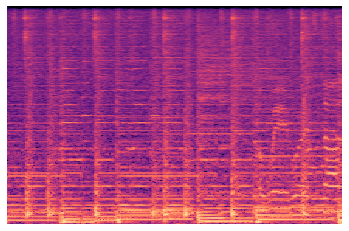

In [3]:

n_fft = 2048
hop_length = 512
n_mels = 512
  

root=r"C:\Users\jayoj\Documents\GT\SML\Data\DSD100_5Noise"
for path, subdirs, files in os.walk(root):
    for name in files:
        if 'wav' in os.path.join(path, name):
            c=os.path.join(path, name)
            c=c.replace("DSD100_5Noise","DSD100_5Noise_PP")
            dir= c[0:(int)(c.rfind("\\"))]
            if not os.path.exists(dir):
                os.makedirs(dir)
            
            print(c)
            y, sr = librosa.load(os.path.join(path, name))
            
            
            # preprocess method (Spectrogram)
            newFile=c.replace(".wav","_Spec.png")
            D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
            librosa.display.specshow(D, sr=sr)
            # save image as .png
            plt.axis('off')
            plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)
            
            # preprocess method (Power Spectrogram db)
            newFile=c.replace(".wav","_PSdb.png")
            DB = librosa.amplitude_to_db(D, ref=np.max)
            librosa.display.specshow(DB, sr=sr, hop_length=hop_length)
            # save image as .png
            plt.axis('off')
            plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)
            
            # preprocess method (MelSpectrogram)
            newFile=c.replace(".wav","_Mel.png")
            S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
            S_DB = librosa.power_to_db(S, ref=np.max)
            librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length)
            # save image as .png
            plt.axis('off')
            plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)
            
            
            # preprocess method (Morlet Wavelet)
            #newFile=c.replace(".wav","_Mor.png")
            #W, scalesy, freqsy, coiy, ffty, fftfreqsy = pycwt.cwt(signal=y,dt=1/sr,s0=1/sr,J=math.log(y.size,2)*12,wavelet=u'morlet')
            #Wdb =librosa.amplitude_to_db(np.asfortranarray(np.abs(W)),ref=np.max) 
            #librosa.display.specshow(Wdb,sr=sr, hop_length=hop_length)
            #save image as .png
            #plt.axis('off')
            #plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)
           
            
            
            

In [5]:
import threading
import time


def mythread():
    print( "%s: %s" % ("THREAD!", time.ctime(time.time())))
    time.sleep(1000)

def main():
    threads = 0     #thread counter
    y = 1000000     #a MILLION of 'em!
    for i in range(y):
        try:
            x = threading.Thread(target=mythread, daemon=True)
            threads += 1    #thread counter
            x.start()       #start each thread
        except RuntimeError:    #too many throws RuntimeError
            break
    print("{} threads created.\n".format(threads))

if __name__ == "__main__":
    main()

THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021THREAD!: Sun Apr 11 14:03:41 2021

THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021

THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun Apr 11 14:03:41 2021
THREAD!: Sun A

THREAD!: Sun Apr 11 14:03:42 2021THREAD!: Sun Apr 11 14:03:42 2021

THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021

THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021THREAD!: Sun Apr 11 14:03:42 2021

THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021
THREAD!: Sun Apr 11 14:03:42 2021THREAD!: Sun Apr 11 14:03:42 2021

THREAD!: Sun A

THREAD!: Sun Apr 11 14:03:42 2021THREAD!: Sun Apr 11 14:03:43 2021

THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021THREAD!: Sun Apr 11 14:03:43 2021

THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021
THREAD!: Sun Apr 11 14:03:43 2021THREAD!: Sun Ap

THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021THREAD!: Sun Apr 11 14:03:44 2021

THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun Apr 11 14:03:44 2021
THREAD!: Sun A

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def process_m(path):
    mutex = threading.Lock()
    
    n_fft = 2048
    hop_length = 512
    n_mels = 512
    
    if (".wav") not in path:
        return
    
    c=path.replace("DSD100_5Noise","DSD100_5Noise_PP")
    dir= c[0:(int)(c.rfind("\\"))]
    
    
    #print(c+"-Thread:"+str(threading.currentThread().name))
    mutex.acquire()
    y, sr = librosa.load(path)
    mutex.release()
    
   
    
    # preprocess method (Spectrogram)
    newFile=c.replace(".wav","_Spec.png")
    D = np.abs(librosa.stft(y, n_fft=n_fft,  hop_length=hop_length))
    if not (os.path.exists(newFile)):
        mutex.acquire()
        librosa.display.specshow(D, sr=sr)
        # save image as .png
        plt.axis('off')
        plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)
        mutex.release()

    # preprocess method (Power Spectrogram db)
    newFile=c.replace(".wav","_PSdb.png")
    if not (os.path.exists(newFile)):
        DB = librosa.amplitude_to_db(D, ref=np.max)
        mutex.acquire()
        librosa.display.specshow(DB, sr=sr, hop_length=hop_length)
        # save image as .png
        plt.axis('off')
        plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)
        mutex.release()

    # preprocess method (MelSpectrogram)
    newFile=c.replace(".wav","_Mel.png")
    if not (os.path.exists(newFile)):
        S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        S_DB = librosa.power_to_db(S, ref=np.max)
        mutex.acquire()
        librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length)
        # save image as .png
        
        plt.axis('off')
        plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)
        mutex.release()
        
        
    print(c+"-Success")

    # preprocess method (Morlet Wavelet)
    #newFile=c.replace(".wav","_Mor.png")
    #W, scalesy, freqsy, coiy, ffty, fftfreqsy = pycwt.cwt(signal=y,dt=1/sr,s0=1/sr,J=math.log(y.size,2)*12,wavelet=u'morlet')
    #Wdb =librosa.amplitude_to_db(np.asfortranarray(np.abs(W)),ref=np.max) 
    #librosa.display.specshow(Wdb,sr=sr, hop_length=hop_length)
    #save image as .png
    #plt.axis('off')
    #plt.savefig(newFile, bbox_inches='tight',pad_inches = 0)